# PIA Aeroelasticidad


Consider the data provided for the following truck. Answer the provided questions. Validate and justify your reasonings and assumptions using sketches, drawings, equations, etc. In all the questions, provide a valid discussion of the results and comparison if applicable.

<img src="Camioneta.jpg" width="350" height="350">
<img src="Esf-def.jpg" width="550" height="550">
<img src="Tabla de datos.jpg">

1. Estimate the equivalent fundamental natural frequency for the vehicle without load and the vehicle fully loaded. Assume an initial (reasonable) deflection for the vehicle SDOF equivalent model.

In [17]:
import numpy as np
import matplotlib.pyplot as plt  #plotting module
%matplotlib inline
from math import sqrt,atan

#Parameters given
mass_tot = 1900              #kg
gross_mass = 2545            #kg
k_susp_front = 94000           #N/m
k_susp_rear = 29650            #N/m
k_tyre_front = 36300           #N/m
k_tyre_rear = 29530            #N/m
TR_front = 2                   #motion rate
TR_rear = 1.2                  #motion rate
mass_dist_front = 0.6          #mass distribution percentage
mass_dist_rear = 0.4          #mass distribution percentage

# Fully load data: calcualitng the spring constant when fully load

x1 = 65.5109
x2 = 81.2725
y1 = 6599.24
y2 = 7771.12

k_fullyload = (x2-x1)/(y2-y1)

For the first part of obtaining the natural frequency of the system, the springs are arrange in a parallel way so, the total K would be:

$k_{tot} = 2k_1 + 2k_2$

Since the distribution of masses is almost very similar to the half-half distribution, this part will be omitted and taken as an equal distribution

And the masses to be used are the gross (fully loaded) and the total of the vehicle which is the one unloaded.

$\omega_{ntot} = \sqrt{\frac{2k_{front} + 2k_{rear}}{m_{tot}}}$ $\;\;\;\;\&\;\;\;\;\;\;$
$\omega_{nfull} = \sqrt{\frac{2k_{front} + 2k_{rear}}{m_{gross}}}$

In [18]:
#Calculating natural frequency loaded and unloaded
omega_ntot = sqrt((2*k_susp_front + 2*k_susp_rear)/mass_tot)
omega_nfull = sqrt((2*k_susp_front + 2*k_fullyload)/gross_mass)

Now assuming initial conditions will permit graphically represent the response of the system. The average height of a speed bump is 152mm. So this will permit to simulate the suspension passing a bump with a considerable speed so the "initial point" is at the top of the bump. And a very small velocity because the code was having some problems calculating te phase angle.

In [19]:
# Set up simulation parameters
t = np.linspace(0, 10, 501)         

# Define the initial conditions for displacement x(0) and velocity x_dot(0)
x0 = np.array([0.152, 0.000001])  #[m, m/s]

2. Estimate (plot) the free response for the cases studied in 1.

Remembering that for free response:

$x(t)=Asin(\omega_n t)+Bcos(\omega_n t)$

Most general solution, $A,$ $B$ constants depend upon Initial Conditions of the system. Evaluating the response and its derivative at $t=0$ gives the particular solution:

$x(t)=\frac{\dot{x_0}}{\omega_n}sin(\omega_n t)+x_0cos(\omega_n t)$

Which can also be expressed as:

$x(t)= Csin(\omega_n t + \phi)$

Considering that C gives the peak amplitude response and $\phi$ is the phase angle:

$C=\sqrt{A^2+B^2}$

$\phi=tan^{-1}\frac{B}{A}$

Results in:

$C=\sqrt{\left(\frac{\dot{x_0}}{\omega_n}\right)^2+x_0^2}=\frac{\sqrt{x_0^2\omega_n^2+\dot{x_o^2}}}{\omega_n}$

$\phi=tan^{-1}\frac{\omega_nx_0}{\dot{x_0}}$

In [20]:
# Calculate amplitude and exponential decay
# First for unloaded vehicle
C_tot = sqrt(x0[0]**2 + ((x0[1])/omega_ntot)**2)
phase_tot = atan(omega_ntot*x0[0]/x0[1]) 
x_t_tot = C_tot * np.sin(omega_ntot*t+phase_tot)

# then for fully load vehicle
C_full = sqrt(x0[0]**2 + ((x0[1])/omega_nfull)**2)
phase_full = atan(omega_nfull*x0[0]/x0[1]) 
x_t_full = C_full * np.sin(omega_nfull*t+phase_full)

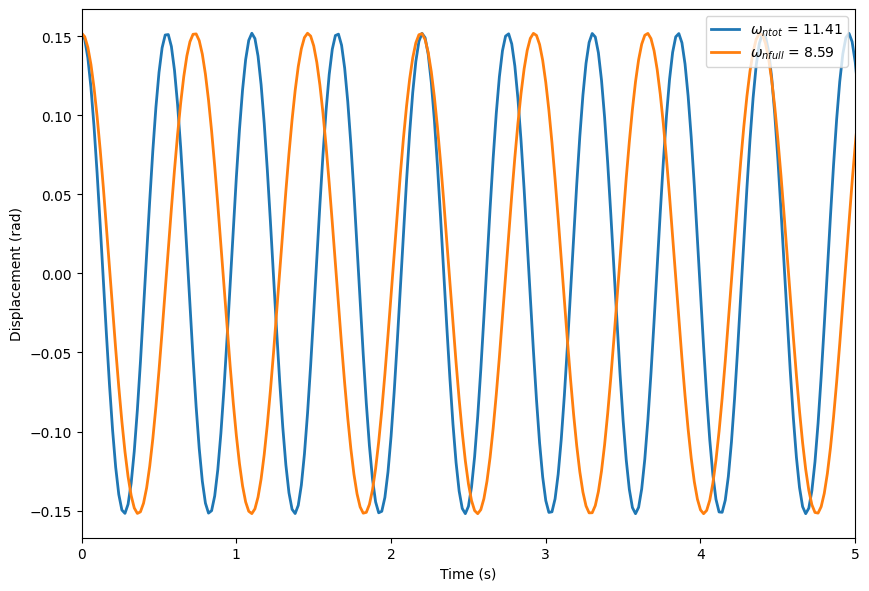

In [21]:
#Plot information
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(t, x_t_tot, linewidth = 2, label = '$\omega_{ntot}$ = %.2f' %(omega_ntot))
plt.plot(t, x_t_full, linewidth = 2, label = '$\omega_{nfull}$ = %.2f' %(omega_nfull))
ax.set_xlabel('Time (s)')
ax.set_ylabel('Displacement (rad)')
plt.xlim(0,5)

# legend
plt.legend(loc='upper right', ncol = 1, fancybox=True)
# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad = 0.5)

# save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('Damped_free_vibration.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

Investigate the effect of damping in the previous case. Assume three damping cases from 
the measured damping, i.e. a very low value of damping, a high value of damping, and a 
nominal value.

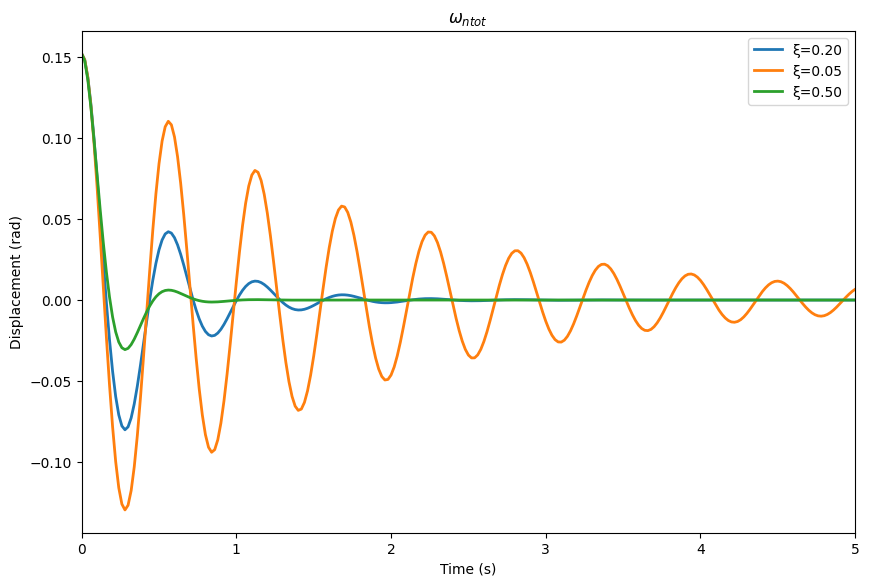

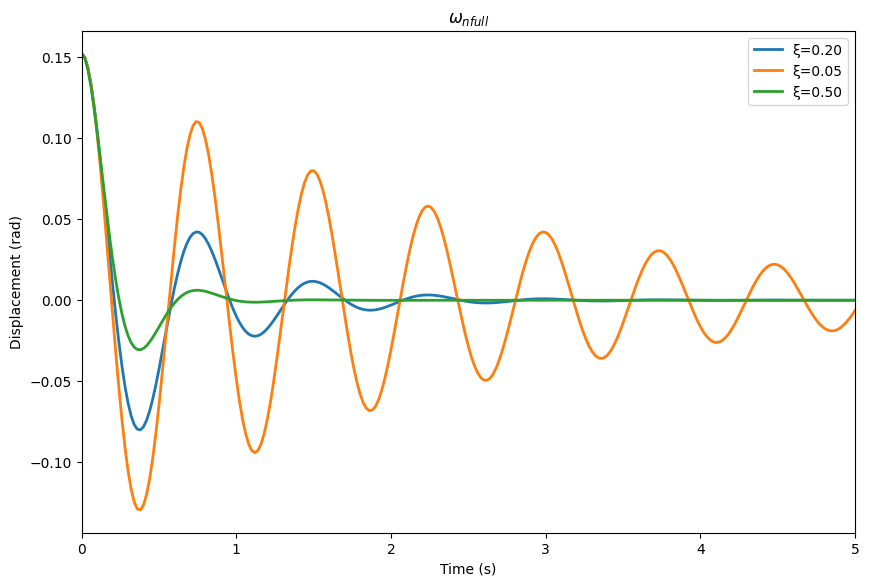

In [22]:
#wntot
#Case 1 Medium
z = 0.2                                 # Viscous damping ratio
wd = omega_ntot*np.sqrt(1 - z**2)       # Damped natural frequency (rad/s)o
#Case 2 low
z2 = 0.05                               # Viscous damping ratio
wd2 = omega_ntot*np.sqrt(1 - z**2)      # Damped natural frequency (rad/s)o
#Case 3 High
z3 = 0.5                                # Viscous damping ratio
wd3 = omega_ntot*np.sqrt(1 - z**2)      # Damped natural frequency (rad/s)o

# Damped medium response equation 
c_tot_z = sqrt(((x0[1]+z*omega_ntot*x0[0])*2 + (x0[0]*wd)**2) /wd*2)
phase_tot_z = atan((x0[0]*wd)/x0[1]*z*omega_ntot*x0[0])
x_t_tot_z = np.exp(-z*omega_ntot*t)*(x0[0]*np.cos(wd*t) + (z*omega_ntot*x0[0] + x0[1])/wd * np.sin(wd*t))

# Damped low response equation
c_tot_z2 = sqrt(((x0[1]+z2*omega_ntot*x0[0])*2 + (x0[0]*wd2)**2) /wd2*2)
phase_tot_z2 = atan((x0[0]*wd2)/x0[1]*z2*omega_ntot*x0[0])
x_t_tot_z2 = np.exp(-z2*omega_ntot*t)*(x0[0]*np.cos(wd2*t) + (z2*omega_ntot*x0[0] + x0[1])/wd2 * np.sin(wd2*t))

# Damped high response equation
c_tot_z3 = sqrt(((x0[1]+z3*omega_ntot*x0[0])*2 + (x0[0]*wd3)**2) /wd3*2)
phase_tot_z3 = atan((x0[0]*wd3)/x0[1]*z3*omega_ntot*x0[0])
x_t_tot_z3 = np.exp(-z3*omega_ntot*t)*(x0[0]*np.cos(wd3*t) + (z3*omega_ntot*x0[0] + x0[1])/wd3 * np.sin(wd3*t))

#wnfull
#Case 1 Medium
wdf = omega_nfull*np.sqrt(1 - z**2)       # Damped natural frequency (rad/s)o
#Case 2 low
wdf2 = omega_nfull*np.sqrt(1 - z**2)      # Damped natural frequency (rad/s)o
#Case 3 High
wdf3 = omega_nfull*np.sqrt(1 - z**2)      # Damped natural frequency (rad/s)o

# Damped medium response equation 
C_full_z = sqrt(((x0[1]+z*omega_nfull*x0[0])*2 + (x0[0]*wdf)**2) /wdf*2)
phase_full_z = atan((x0[0]*wdf)/x0[1]*z*omega_nfull*x0[0])
x_t_full_z = np.exp(-z*omega_nfull*t)*(x0[0]*np.cos(wdf*t) + (z*omega_nfull*x0[0] + x0[1])/wdf * np.sin(wdf*t))

# Damped low response equation
C_full_z2 = sqrt(((x0[1]+z2*omega_nfull*x0[0])*2 + (x0[0]*wdf2)**2) /wdf2*2)
phase_full_z2 = atan((x0[0]*wdf2)/x0[1]*z2*omega_nfull*x0[0])
x_t_full_z2 = np.exp(-z2*omega_nfull*t)*(x0[0]*np.cos(wdf2*t) + (z2*omega_nfull*x0[0] + x0[1])/wdf2 * np.sin(wdf2*t))

# Damped high response equation
C_full_z3 = sqrt(((x0[1]+z3*omega_nfull*x0[0])*2 + (x0[0]*wdf3)**2) /wdf3*2)
phase_full_z3 = atan((x0[0]*wdf3)/x0[1]*z3*omega_nfull*x0[0])
x_t_full_z3 = np.exp(-z3*omega_nfull*t)*(x0[0]*np.cos(wdf3*t) + (z3*omega_nfull*x0[0] + x0[1])/wdf3 * np.sin(wdf3*t))


#Plot information wntot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(t, x_t_tot_z, linewidth = 2, label = r'ξ=%.2f'%(z))
plt.plot(t, x_t_tot_z2, linewidth = 2, label = r'ξ=%.2f'%(z2))
plt.plot(t, x_t_tot_z3, linewidth = 2, label = r'ξ=%.2f'%(z3))
ax.set_xlabel('Time (s)')
ax.set_ylabel('Displacement (rad)')
plt.title('$\omega_{ntot}$')
plt.xlim(0,5)


# legend
plt.legend(loc='upper right', ncol = 1, fancybox=True)
# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad = 0.5)

# save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('Damped_free_vibration.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook


#Plot information wnfull
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(t, x_t_full_z, linewidth = 2, label = r'ξ=%.2f'%(z))
plt.plot(t, x_t_full_z2, linewidth = 2, label = r'ξ=%.2f'%(z2))
plt.plot(t, x_t_full_z3, linewidth = 2, label = r'ξ=%.2f'%(z3))
ax.set_xlabel('Time (s)')
ax.set_ylabel('Displacement (rad)')
plt.title('$\omega_{nfull}$')
plt.xlim(0,5)


# legend
plt.legend(loc='upper right', ncol = 1, fancybox=True)
# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad = 0.5)

# save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('Damped_free_vibration.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

Considering the values assumed in point 3 (mass and damping), plot the magnitude and 
phase plots of the FRF assuming a SDOF model under harmonic forcing function. Express 
the system equations and the procedure to obtain the FRF

Assuming this is a SDOF

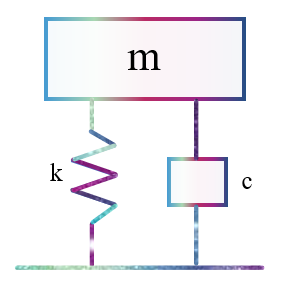


Using complex notation, we know that

$m\ddot{x} + c\dot{x} + kx = F sin(\omega t)$

$x(t)= X e^ {i \omega t}$

$\dot{x(t)}= i \omega X e^ {i \omega t}$

$\ddot{x(t)}= -\omega^2 X e^ {i \omega t}$

$F(t)= F e^ {i \omega t}$

Making a Force analysis of the system

$-m \omega^2 X e^ {i \omega t} +  i c \omega X e^ {i \omega t}+ k X e^ {i \omega t} = F e^ {i \omega t}$

Everything is divided by

$e^ {i \omega t}$

in both sides of the equation

Isolating the x it is obtained

$(-m \omega^2 +  i c \omega + k) X = F $

Then it is obtain that

$ \frac{X}{F} = \frac{1}{(-m \omega^2 +  i c \omega + k)}$




[None, None, None, None, None, None]

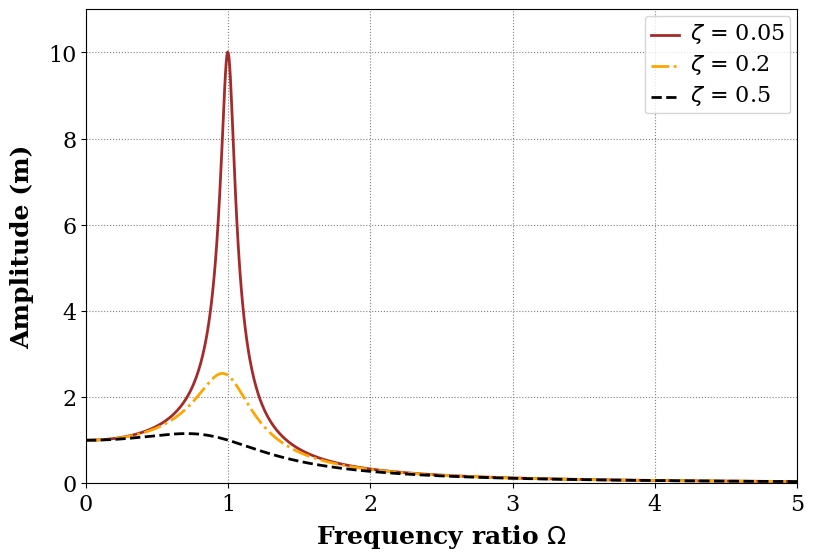

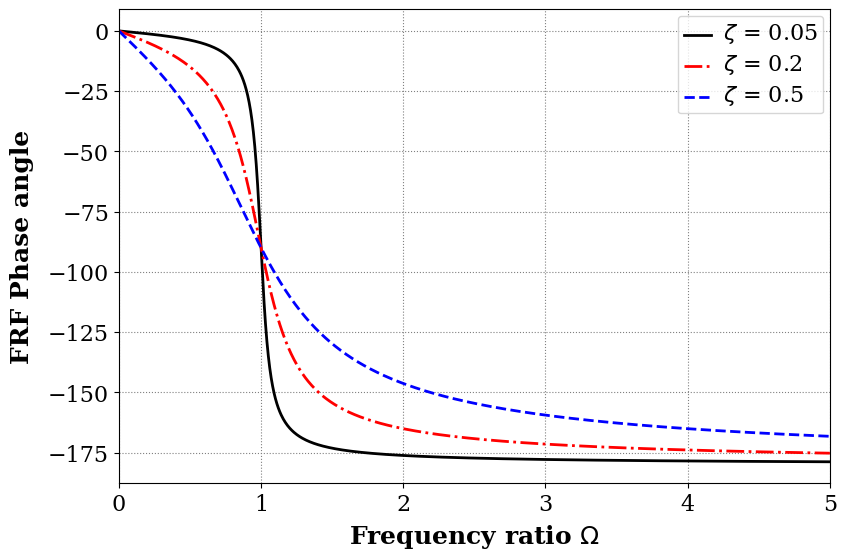

In [23]:
import numpy as np    # numpy is the main module for numeric calculations, which will be called as np
# Import the plotting module 
import matplotlib.pyplot as plt
# Set up parameters
wr = np.linspace(0,5,1000)          # Frequency ratio range for FRF plot

zeta = 0.05
FRF_mag_01 = np.abs(1/(1-wr**2 + 1j*2*zeta*wr))# Correction for getting X (amplitude)
FRF_phase_01 = np.angle(1/(1-wr**2 + 1j*2*zeta*wr))* 180/np.pi

zeta = 0.2
FRF_mag_05 = np.abs(1/(1-wr**2 + 1j*2*zeta*wr))# Correction for getting X (amplitude)
FRF_phase_05 = np.angle(1/(1-wr**2 + 1j*2*zeta*wr))* 180/np.pi

zeta = 0.5
FRF_mag_1 = np.abs(1/(1-wr**2 + 1j*2*zeta*wr))# Correction for getting X (amplitude)
FRF_phase_1 = np.angle(1/(1-wr**2 + 1j*2*zeta*wr))* 180/np.pi

# Plot the magnitude
# Change the size of plot
fig = plt.figure(figsize=(9,6))

# Get current axes using gca
ax = plt.gca()

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=16)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=16)

# Tweak spacing to prevent clipping of labels
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Plot grid can be activated and modified
ax.grid(True,linestyle=':',color='0.5')
ax.set_axisbelow(True)

# Define axis labels
plt.xlabel('Frequency ratio $\Omega$',family='serif',fontsize=18,weight='bold',labelpad=5)
plt.ylabel('Amplitude (m)',family='serif',fontsize=18,weight='bold',labelpad=10)
plt.plot(wr, FRF_mag_01,color="brown", linewidth=2, linestyle = '-', label=r'$\zeta$ = 0.05')
plt.plot(wr, FRF_mag_05, color="orange",linewidth=2, linestyle = '-.', label=r'$\zeta$ = 0.2')
plt.plot(wr, FRF_mag_1, color="black",linewidth=2, linestyle = '--', label=r'$\zeta$ = 0.5')

#plt.plot(wr, FRF_mag_3, linewidth=2, linestyle = ':', label=r'$\zeta$ = 0.3')
plt.xlim(0,5)
plt.ylim(0,11)
leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='Serif',fontsize=16)

# MAGNITUDE

# Plot the phase

# Change the size of plot
fig = plt.figure(figsize=(9,6))
 
# Get current axes using gca
ax = plt.gca()

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=16)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=16)

# Tweak spacing to prevent clipping of labels
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Plot grid can be activated and modified
ax.grid(True,linestyle=':',color='0.5')
ax.set_axisbelow(True)

# Define axis labels
plt.xlabel('Frequency ratio $\Omega$',family='serif',fontsize=18,weight='bold',labelpad=5)
plt.ylabel('FRF Phase angle',family='serif',fontsize=18,weight='bold',labelpad=10)
plt.plot(wr, FRF_phase_01, color="black",linewidth=2, linestyle = '-', label=r'$\zeta$ = 0.05')
plt.plot(wr, FRF_phase_05, color="red",linewidth=2, linestyle = '-.', label=r'$\zeta$ = 0.2')
plt.plot(wr, FRF_phase_1, color="blue",linewidth=2, linestyle = '--', label=r'$\zeta$ = 0.5')

plt.xlim(0,5)
leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='Serif',fontsize=16)
